## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

## Nome: Eduardo Marques
## Número: 45977

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## A45977-Lab2.ipynb (A45977: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab2-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## Pergunta 1.1

[0 1 2 3]
Centroide da Classe 0:  [-0.13243819  0.03660923]
Centroide da Classe 1:  [-0.77640453  1.25665047]
Centroide da Classe 2:  [0.01068383 0.25081224]
Centroide da Classe 3:  [-0.0907223  -0.54198523]


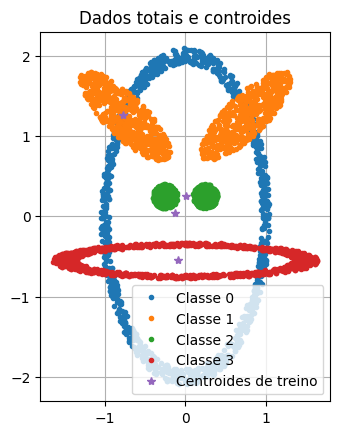

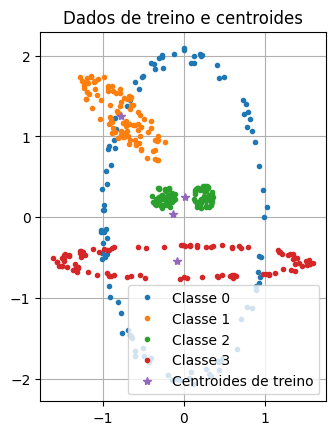

In [23]:
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']
print(np.unique(y))


#dados de treino e de teste, 1 e 2 respetivamente
X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

#calculam-se as medias
m0 = np.mean(X1[:,y1==0], axis=1)
m1 = np.mean(X1[:,y1==1], axis=1)
m2 = np.mean(X1[:,y1==2], axis=1)
m3 = np.mean(X1[:,y1==3], axis=1)

#stack das medias
m = np.stack((m0, m1, m2, m3))

#medias dos vals dos centroides
print('Centroide da Classe 0: ', m0)
print('Centroide da Classe 1: ', m1)
print('Centroide da Classe 2: ', m2)
print('Centroide da Classe 3: ', m3)

#plt dos dados
plt.plot(X[0,y==0],X[1,y==0],'.', label='Classe 0')
plt.plot(X[0,y==1],X[1,y==1],'.', label='Classe 1')
plt.plot(X[0,y==2],X[1,y==2],'.', label='Classe 2')
plt.plot(X[0,y==3],X[1,y==3],'.', label='Classe 3')
plt.plot(m[:,0], m[:,1], '*', label='Centroides de treino')
plt.legend(loc='lower right')
plt.axis('scaled')
plt.title('Dados totais e controides')
plt.grid(True)
plt.show()

#plot do teste

plt.plot(X1[0,y1==0],X1[1,y1==0],'.', label='Classe 0')
plt.plot(X1[0,y1==1],X1[1,y1==1],'.', label='Classe 1')
plt.plot(X1[0,y1==2],X1[1,y1==2],'.', label='Classe 2')
plt.plot(X1[0,y1==3],X1[1,y1==3],'.', label='Classe 3')
plt.plot(m[:,0], m[:,1], '*', label='Centroides de treino')
plt.legend(loc='lower right')
plt.axis('scaled')
plt.title('Dados de treino e centroides')
plt.grid(True)
plt.show()
#podemos 

Podemos verificar que a classe 1 de treino tem o centroide à esquerda, o que significa que os dados de teste estão à direita, o que vai fazer com que existam erros

## Pergunta 1.2

Número Total de Erros:  1641
Matriz de Confusão:
 [[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]


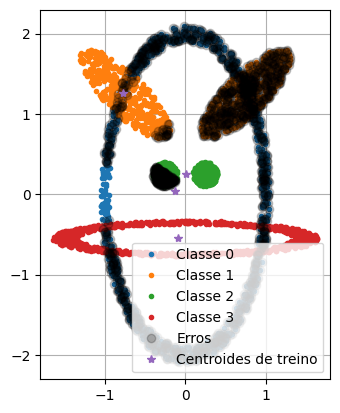

In [24]:
#Dist eurclideana = raíz da soma dos quadrados da diferença entre coordenadas
Xtmp = X2-m0[:,np.newaxis]
D0   = np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp = X2-m1[:,np.newaxis]
D1   = np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp = X2-m2[:,np.newaxis]
D2   = np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp = X2-m3[:,np.newaxis]
D3   = np.sqrt(np.sum(Xtmp**2,axis=0))

DEuclideana = np.vstack((D0, D1, D2, D3))

y2e  = np.argmin(DEuclideana, axis=0)

print('Número Total de Erros: ', np.sum(y2!=y2e))
print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))

plt.plot(X2[0,y2==0], X2[1,y2==0], '.', label='Classe 0')
plt.plot(X2[0,y2==1], X2[1,y2==1], '.', label='Classe 1')
plt.plot(X2[0,y2==2], X2[1,y2==2], '.', label='Classe 2')
plt.plot(X2[0,y2==3], X2[1,y2==3], '.', label='Classe 3')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.plot(m[:,0], m[:,1], '*', label='Centroides de treino')
plt.legend(loc='lower right')
plt.axis('scaled')
plt.grid(True)

## Pergunta 1.3

#### Mais de metade dos pontos da classe 1 não são classificados corretamente pois o conjunto de treino apenas tem pontos do lado esquerdo do conjunto. Podemos então ver que a todos os pontos que se encontram do lado direito da classe 1 estão errados. Os pontos são considerados errados pois encontram-se longe do seu centroide.

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

## Pergunta 2.1

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
print('Classificação Por Vizinhança k=1')
print('Número Total de Erros: ', np.sum(y2!=y2e))
print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))

Classificação Por Vizinhança k=1
Número Total de Erros:  601
Matriz de Confusão:
 [[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]


## Pergunta 2.2

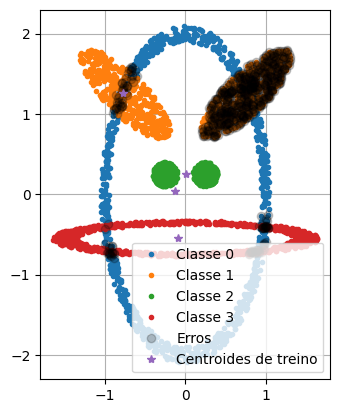

In [26]:
plt.plot(X2[0,y2==0], X2[1,y2==0], '.', label='Classe 0')
plt.plot(X2[0,y2==1], X2[1,y2==1], '.', label='Classe 1')
plt.plot(X2[0,y2==2], X2[1,y2==2], '.', label='Classe 2')
plt.plot(X2[0,y2==3], X2[1,y2==3], '.', label='Classe 3')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.plot(m[:,0], m[:,1], '*', label='Centroides de treino')
plt.legend(loc='lower right')
plt.axis('scaled')
plt.grid(True)

Podemos ver que, utilizando os k vizinhos mais proximos, temos uma quantidade de erros bastante menor, passando de 1641 para 601. A maior diferença está na classe 0, onde existiam bastantes erros na primeira pergunta e onde agora existem poucos, porem a classe 1 continua com quase os mesmos erros devido ao conjunto de treino

## Pergunta 2.3

Classificação Por Vizinhança k=5
Número Total de Erros:  639
Matriz de Confusão:
 [[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]


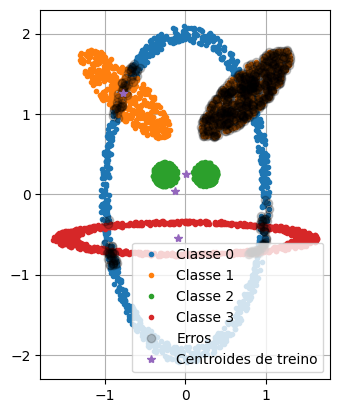

In [27]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X1.T, y1)
y2e = knn.predict(X2.T)
print('Classificação Por Vizinhança k=5')
print('Número Total de Erros: ', np.sum(y2!=y2e))
print('Matriz de Confusão:\n', confusion_matrix(y2, y2e))

plt.plot(X2[0,y2==0], X2[1,y2==0], '.', label='Classe 0')
plt.plot(X2[0,y2==1], X2[1,y2==1], '.', label='Classe 1')
plt.plot(X2[0,y2==2], X2[1,y2==2], '.', label='Classe 2')
plt.plot(X2[0,y2==3], X2[1,y2==3], '.', label='Classe 3')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.plot(m[:,0], m[:,1], '*', label='Centroides de treino')
plt.legend(loc='lower right')
plt.axis('scaled')
plt.grid(True)

Com k=5, o numero de erros é lijeiramente maior, este erro deve-se ao facto das fronteiras de decisão se tornarem mais regulares. 

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

## Pergunta 3.1 e 3.2

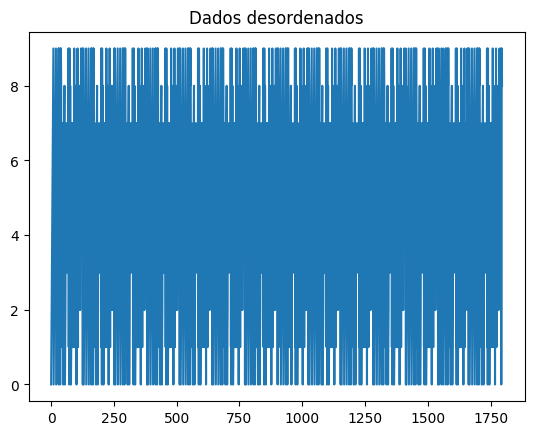

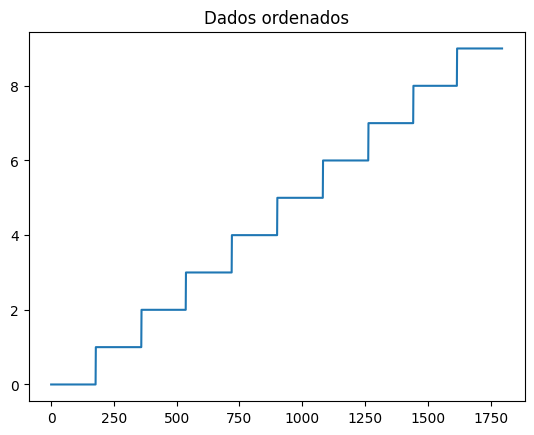

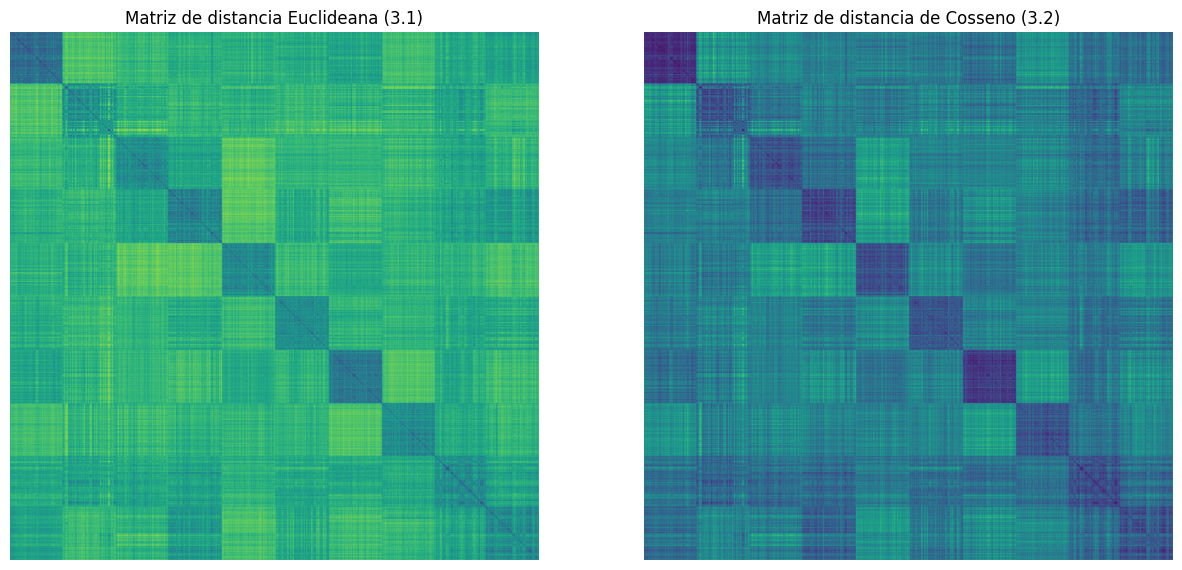

In [28]:
import sklearn.datasets as dt
import scipy.spatial.distance as spd
D=dt.load_digits()
X=D.data
y=D.target

plt.plot(y)
plt.title('Dados desordenados')
plt.show()

#organizam-se os dados y por classe
Y_ordered = np.argsort(y)

#com y organizado, tem de se organizar X e y
X_ordered = X[Y_ordered,:]
y_ordered = y[Y_ordered]

plt.plot(y_ordered)
plt.title('Dados ordenados')
plt.show()

D2 = spd.squareform(spd.pdist(X_ordered, 'euclidean'))
Dc = spd.squareform(spd.pdist(X_ordered, 'cosine'))

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(D2)
plt.title('Matriz de distancia Euclideana (3.1)')
plt.axis('off')
plt.subplot(122)
plt.imshow(Dc)
plt.title('Matriz de distancia de Cosseno (3.2)')
plt.axis('off')
plt.show()
